<a href="https://colab.research.google.com/github/KingPauline/Masters_Schemes/blob/master/shortest_path_bykpi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Зададим произвольный граф с 10 узлами *ниже будет рисунок*
Определим показатели KPI, как время, стоимость и надежность.Граф содержит 10 узлов, на каждой дуге определяется 3 свойства: время в пути,затраты на перевозку, надежность. Диапазон значений весов 0 < x <= 1

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# Задаем граф и веса как время
edges =  [
       (1,2, {"time":0.2,"cost":0.3,"sec":0.1}),
       (1,3, {"time":0.1, "cost":0.2,"sec":0.5}),
       (2,3, {"time":0.8, "cost":0.7,"sec":0.3}),
       (2,5, {"time":0.15, "cost":0.1,"sec":0.5}),
       (3,4, {"time":0.7, "cost":0.6,"sec":0.4}),
       (4,5, {"time":0.2, "cost":0.2,"sec":0.2}),
       (5,6, {"time":0.1, "cost":0.7,"sec":0.8}),
       (5,8, {"time":0.35, "cost":0.5,"sec":0.5}),
       (6,7, {"time":0.3, "cost":0.7,"sec":0.05}),
       (6,8, {"time":0.1, "cost":0.6,"sec":0.6}),
       (7,8, {"time":0.9, "cost":0.1,"sec":0.4}),
       (7,9, {"time":0.25, "cost":0.4,"sec":0.3}),
       (7,10, {"time":0.44, "cost":0.2,"sec":0.2}),
       (8,9, {"time":0.05, "cost":0.8,"sec":0.6}),
       (9,10, {"time":0.4, "cost":0.75,"sec":0.1}),
]

G=nx.Graph()
# Добавляем узлы
for i in range(1,11):
    G.add_node(i)
# Добавляем дуги
G.add_edges_from(edges)

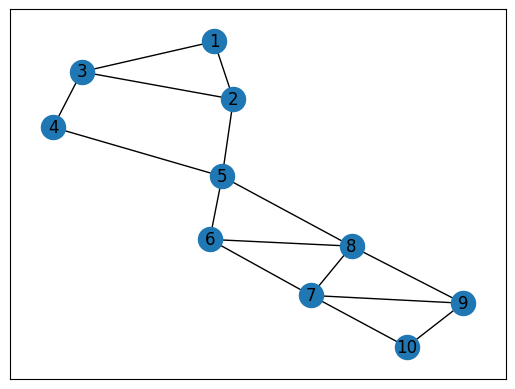

In [ ]:
# # Рисуем граф
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.show()

Найдем целевой KPI. Определим кратчайшие пути по каждому параметру

In [ ]:
#По времени
p1to10_time = nx.shortest_path(G, source=1, target=10, weight="time")
length_time = nx.shortest_path_length(G, source=1, target=10, weight="time")
print("Кратчайший путь от узла 1 до 10 по времени: ", p1to10_time)
print("Длина кратчайшего пути по времени: ", length_time)
length_time_balanced = length_time + length_time*0.4
print("Длина кратчайшего пути по времени c уступкой: ", length_time_balanced)

Кратчайший путь от узла 1 до 10 по времени:  [1, 2, 5, 6, 8, 9, 10]
Длина кратчайшего пути по времени:  1.0
Длина кратчайшего пути по времени c уступкой:  1.4


In [ ]:
# По стоимости
p1to10_cost = nx.shortest_path(G, source=1, target=10, weight="cost")
length_cost = nx.shortest_path_length(G, source=1, target=10, weight="cost")
print("Кратчайший путь от узла 1 до 10 по затратам: ", p1to10_cost)
length_cost_balanced = length_cost + length_cost*0.4
print("Длина кратчайшего пути по затратам: ", length_cost)
print("Длина кратчайшего пути по затратам с уступкой: ", length_cost_balanced)

Кратчайший путь от узла 1 до 10 по затратам:  [1, 2, 5, 8, 7, 10]
Длина кратчайшего пути по затратам:  1.2
Длина кратчайшего пути по затратам с уступкой:  1.68


In [ ]:
# По надежности
p1to10_sec = nx.shortest_path(G, source=1, target=10, weight="sec")
length_sec = nx.shortest_path_length(G, source=1, target=10, weight="sec")
print("Кратчайший путь от узла 1 до 10 по надежности: ", p1to10_sec)
print("Длина кратчайшего пути по надежности: ", length_sec)
length_sec_balanced = length_sec + length_sec*0.4
print("Длина кратчайшего пути по надежности с уступкой: ", length_sec_balanced)

Кратчайший путь от узла 1 до 10 по надежности:  [1, 2, 5, 6, 7, 10]
Длина кратчайшего пути по надежности:  1.65
Длина кратчайшего пути по надежности:  2.31


Берем за основу минимальную стоимость

In [ ]:
print("Кратчайший путь от узла 1 до 10 по затратам: ", p1to10_cost)
print("Целевые KPI: Время",length_time_balanced,", Стоимость", length_cost_balanced, ", Надежность", length_sec_balanced)
min_cost_time = nx.path_weight(G,p1to10_cost, weight="time")
min_cost_sec = nx.path_weight(G,p1to10_cost, weight="sec")
print("Текущие KPI: Время",min_cost_time,", Стоимость", length_cost, ", Надежность", min_cost_sec)


Кратчайший путь от узла 1 до 10 по затратам:  [1, 2, 5, 8, 7, 10]
Целевые KPI: Время 1.4 , Стоимость 1.68 , Надежность 2.31
Текущие KPI: Время 2.04 , Стоимость 1.2 , Надежность 1.7


Видим, что мы не укладываемcя по времени в целевые KPI. Целевое значение - 1.4, текущее 2.04. Следовательно, нам необходимо принять уступку на стоимости. Сделаем минимизацию по времени с учетом, что стоимость может быть выше целевого значения, добавим 20%

In [ ]:
print("Кратчайший путь от узла 1 до 10 по времени: ", p1to10_time)
print("Целевые KPI: Время",length_time_balanced,", Стоимость", (length_cost_balanced + length_cost_balanced*0.2), ", Надежность", length_sec_balanced)
min_time_cost = nx.path_weight(G,p1to10_time, weight="cost")
min_time_sec = nx.path_weight(G,p1to10_time, weight="sec")
print("Текущие KPI: Время",length_time,", Стоимость", min_time_cost, ", Надежность", min_time_sec)


Кратчайший путь от узла 1 до 10 по времени:  [1, 2, 5, 6, 8, 9, 10]
Целевые KPI: Время 1.4 , Стоимость 2.016 , Надежность 2.31
Текущие KPI: Время 1.0 , Стоимость 3.25 , Надежность 2.7


Из минимизации времени мы видим, что стоимость сильно возросла по отношению к целевому KPI и даже при уступке сильно превышает целевое значение. Надежность также превышает целевое значение. Попробуем минимизировать надежность с уступкой по времени +20%

In [ ]:
print("Кратчайший путь от узла 1 до 10 по надежности: ", p1to10_sec)
print("Целевые KPI: Время",(length_time_balanced + length_time_balanced*0.2),", Стоимость", (length_cost_balanced + length_cost_balanced*0.2), ", Надежность", length_sec_balanced)
min_sec_time = nx.path_weight(G,p1to10_sec, weight="time")
min_sec_cost = nx.path_weight(G,p1to10_sec, weight="cost")
print("Текущие KPI: Время",min_sec_time,", Стоимость", min_sec_cost, ", Надежность", length_sec)

Кратчайший путь от узла 1 до 10 по надежности:  [1, 2, 5, 6, 7, 10]
Целевые KPI: Время 1.68 , Стоимость 2.016 , Надежность 2.31
Текущие KPI: Время 1.19 , Стоимость 2.0 , Надежность 1.65


Мы видим, что при минимизации надежности удалось уложиться во времени, стоимости и надежности

Имеем два варианта KPI:

**При минимизации стоимости:** sum(Время 2.04 , Стоимость 1.2 , Надежность 1.7) = 4.94

**При минимизации надежности:** sum (Время 1.19 , Стоимость 2.0 , Надежность 1.65) = 4.84

Выберем сбалансированный KPI

Сбалансированный KPI:  Время 1.19 , Стоимость 2.0 , Надежность 1.65

Первоначальный целевой KPI: Время 1.4 , Стоимость 1.68 , Надежность 2.31
